In [63]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline
from sklearn import metrics
import warnings
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
warnings.filterwarnings("ignore")
import seaborn as sns
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [64]:
# function to display dataframes side by side
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [65]:
# reading the datasets
train = pd.read_csv("/users/akshay/desktop/HackerEarth/train.csv")
test  =pd.read_csv("/users/akshay/desktop/HackerEarth/test.csv")

In [66]:
# head of train dataset
print("\x1b[1;34m"+"Train Dataset :Shape of the train dataset is",len(train),"rows and",len(train.columns),"columns"+"\x1b[0m")
display(train.head())
# head of test dataset
print("\x1b[1;34m"+"Test Dataset :Shape of the test dataset is",len(test),"rows and",len(test.columns),"columns"+"\x1b[0m")
display(test.head())

Train Dataset :Shape of the train dataset is 10000 rows and 12 columns


,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


Test Dataset :Shape of the test dataset is 2500 rows and 11 columns


,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,19.497717,16,6,72.151322,0.388959,78.32,4,37949.724386,2,0.069692,1
1,58.173516,15,3,64.585232,0.250841,78.60,7,30194.805567,2,0.002777,10
2,33.287671,15,3,64.721969,0.336669,86.96,6,17572.925484,1,0.004316,14
3,3.287671,21,5,66.362808,0.421775,80.86,3,40209.186341,2,0.199990,17
4,10.867580,18,2,56.107566,0.313228,79.22,2,35495.525408,2,0.483696,21


In [67]:
# checking for null values in the train dataset
null=pd.DataFrame(train.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(train.isna().sum()/len(train)*100)
train_null=null
# checking for null values in the test dataset
null=pd.DataFrame(test.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(test.isna().sum()/len(test)*100)
test_null=null
display_side_by_side(train_null,test_null)

,Null Values,% Missing Values
Severity,0,0.0
Safety_Score,0,0.0
Days_Since_Inspection,0,0.0
Total_Safety_Complaints,0,0.0
Control_Metric,0,0.0
Turbulence_In_gforces,0,0.0
Cabin_Temperature,0,0.0
Accident_Type_Code,0,0.0
Max_Elevation,0,0.0
Violations,0,0.0


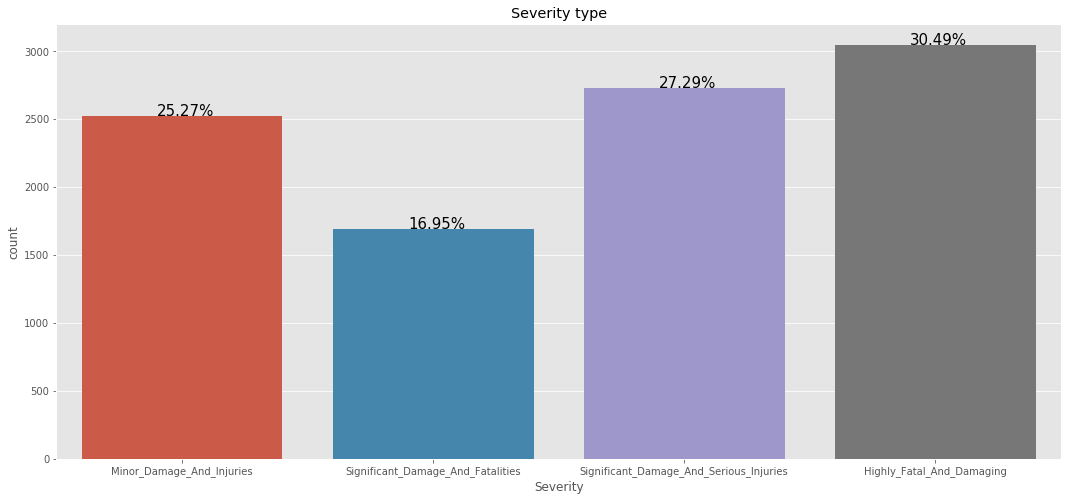

In [68]:
# checking the dataset balanced or imbalanced
plt.figure(figsize=(18,8))
ax=sns.countplot(train["Severity"])
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.3, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='black')
plt.title("Severity type")
plt.show()

In [69]:
# modeling
train=train.drop("Accident_ID",1)
test=test.drop("Accident_ID",1)

In [70]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train["Severity1"]=le.fit_transform(train["Severity"])

In [71]:
train["Severity1"].value_counts()

0    3049
3    2729
1    2527
2    1695
Name: Severity1, dtype: int64

In [72]:
train["Severity"].value_counts()

Highly_Fatal_And_Damaging                  3049
Significant_Damage_And_Serious_Injuries    2729
Minor_Damage_And_Injuries                  2527
Significant_Damage_And_Fatalities          1695
Name: Severity, dtype: int64

In [73]:
train=train.drop("Severity",1)

In [74]:
train.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Severity1
0,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,1
1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,1
2,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2
3,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,3
4,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,2


In [75]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
se=MinMaxScaler()
X=train.drop("Severity1",1)
y=train["Severity1"]

In [76]:
from imblearn.over_sampling import SMOTE

In [77]:
sm=SMOTE()
X,y=sm.fit_sample(X,y)

In [78]:
X=se.fit_transform(X)

In [79]:
test=se.transform(test)

In [80]:
X=pd.DataFrame(X,columns=train.columns[:-1])

In [81]:
xtrain, x_test,ytrain, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42,stratify=y)

In [154]:
from sklearn.ensemble import BaggingClassifier
bgg= BaggingClassifier(n_estimators=100)
bgg.fit(xtrain,ytrain)
bgg_pred=bgg.predict(x_test)

          Predicted:0  Predicted:1  Predicted:2  Predicted:3
Actual:0          565           18           16           11
Actual:1           16          560           25            9
Actual:2            3           28          563           16
Actual:3            9           19            5          577


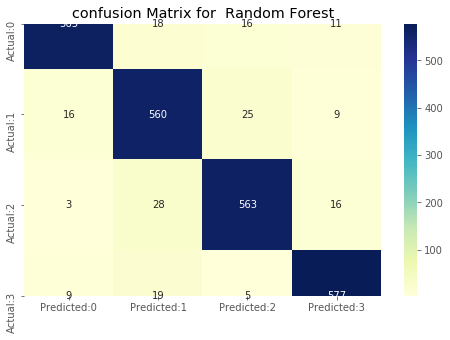

In [155]:
cm=confusion_matrix(y_test,bgg_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1','Predicted:2','Predicted:3'],
                         index=['Actual:0','Actual:1','Actual:2','Actual:3'])
print(conf_matrix)
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.title("confusion Matrix for  Random Forest")
plt.show()

In [156]:
print("Training accuracy:", accuracy_score(ytrain,bgg.predict(xtrain)))
print("Test accuracy:", accuracy_score(y_test,bgg_pred))
print("-"*100)
print("\n")
print("classification report for Decision Tree :\n\n",classification_report(y_test, bgg_pred))

Training accuracy: 1.0
Test accuracy: 0.9282786885245902
----------------------------------------------------------------------------------------------------


classification report for Decision Tree :

               precision    recall  f1-score   support

           0       0.95      0.93      0.94       610
           1       0.90      0.92      0.91       610
           2       0.92      0.92      0.92       610
           3       0.94      0.95      0.94       610

    accuracy                           0.93      2440
   macro avg       0.93      0.93      0.93      2440
weighted avg       0.93      0.93      0.93      2440



In [157]:
pred=bgg.predict(test)

In [158]:
pred=le.inverse_transform(pred)

In [159]:
pred=pd.DataFrame(pred,columns=["Severity"])

In [88]:
test1.columns

Index(['Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints',
       'Control_Metric', 'Turbulence_In_gforces', 'Cabin_Temperature',
       'Accident_Type_Code', 'Max_Elevation', 'Violations',
       'Adverse_Weather_Metric', 'Accident_ID'],
      dtype='object')

In [160]:
test1=pd.read_csv("/users/akshay/desktop/HackerEarth/test.csv")
submission=pd.DataFrame()
submission=test1[["Accident_ID"]]
submission["Severity"]=pred["Severity"]

In [162]:
submission.to_csv("/users/akshay/desktop/HackerEarth/submission12.csv",index=False)

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
import catboost as cb

In [135]:
import catboost as cb

In [136]:
cb=cb.CatBoostClassifier(depth=7,iterations=300,l2_leaf_reg=1,learning_rate=0.1)
cb.fit(xtrain,ytrain)
cb_pred=cb.predict(x_test)

0:	learn: 1.2337733	total: 32.6ms	remaining: 9.74s
1:	learn: 1.1307804	total: 58.3ms	remaining: 8.69s
2:	learn: 1.0549746	total: 76.3ms	remaining: 7.55s
3:	learn: 0.9797016	total: 95.3ms	remaining: 7.05s
4:	learn: 0.9189919	total: 111ms	remaining: 6.56s
5:	learn: 0.8647889	total: 128ms	remaining: 6.26s
6:	learn: 0.8280725	total: 144ms	remaining: 6.04s
7:	learn: 0.7867884	total: 161ms	remaining: 5.88s
8:	learn: 0.7603635	total: 178ms	remaining: 5.75s
9:	learn: 0.7281926	total: 194ms	remaining: 5.63s
10:	learn: 0.7055126	total: 211ms	remaining: 5.54s
11:	learn: 0.6769416	total: 227ms	remaining: 5.46s
12:	learn: 0.6486595	total: 249ms	remaining: 5.49s
13:	learn: 0.6218049	total: 273ms	remaining: 5.58s
14:	learn: 0.6073350	total: 290ms	remaining: 5.51s
15:	learn: 0.5856618	total: 306ms	remaining: 5.44s
16:	learn: 0.5699282	total: 323ms	remaining: 5.37s
17:	learn: 0.5558358	total: 341ms	remaining: 5.34s
18:	learn: 0.5422759	total: 358ms	remaining: 5.3s
19:	learn: 0.5301038	total: 375ms	rema

162:	learn: 0.1651416	total: 2.97s	remaining: 2.5s
163:	learn: 0.1645172	total: 2.99s	remaining: 2.48s
164:	learn: 0.1627755	total: 3.01s	remaining: 2.46s
165:	learn: 0.1624102	total: 3.03s	remaining: 2.44s
166:	learn: 0.1614648	total: 3.04s	remaining: 2.42s
167:	learn: 0.1609782	total: 3.06s	remaining: 2.41s
168:	learn: 0.1601761	total: 3.08s	remaining: 2.39s
169:	learn: 0.1595990	total: 3.1s	remaining: 2.37s
170:	learn: 0.1583602	total: 3.12s	remaining: 2.35s
171:	learn: 0.1580174	total: 3.14s	remaining: 2.34s
172:	learn: 0.1577556	total: 3.16s	remaining: 2.32s
173:	learn: 0.1571125	total: 3.18s	remaining: 2.3s
174:	learn: 0.1559513	total: 3.2s	remaining: 2.29s
175:	learn: 0.1551121	total: 3.23s	remaining: 2.28s
176:	learn: 0.1547616	total: 3.25s	remaining: 2.26s
177:	learn: 0.1543428	total: 3.28s	remaining: 2.25s
178:	learn: 0.1540660	total: 3.3s	remaining: 2.23s
179:	learn: 0.1525368	total: 3.32s	remaining: 2.21s
180:	learn: 0.1522189	total: 3.34s	remaining: 2.2s
181:	learn: 0.1515

          Predicted:0  Predicted:1  Predicted:2  Predicted:3
Actual:0          572            9           15           14
Actual:1           15          576            7           12
Actual:2            5           24          570           11
Actual:3            7           17            8          578


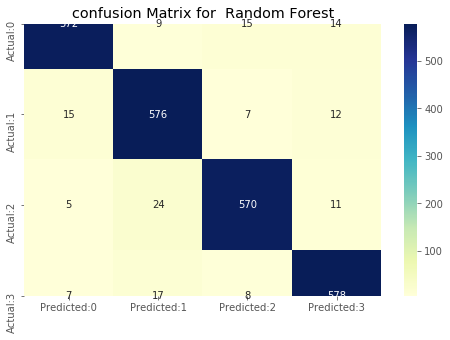

In [137]:
cm=confusion_matrix(y_test,cb_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1','Predicted:2','Predicted:3'],
                         index=['Actual:0','Actual:1','Actual:2','Actual:3'])
print(conf_matrix)
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.title("confusion Matrix for  Random Forest")
plt.show()

In [138]:
print("Training accuracy:", accuracy_score(ytrain,cb.predict(xtrain)))
print("Test accuracy:", accuracy_score(y_test,cb_pred))
print("-"*100)
print("\n")
print("classification report for Decision Tree :\n\n",classification_report(y_test, cb_pred))

Training accuracy: 0.9793972939729397
Test accuracy: 0.940983606557377
----------------------------------------------------------------------------------------------------


classification report for Decision Tree :

               precision    recall  f1-score   support

           0       0.95      0.94      0.95       610
           1       0.92      0.94      0.93       610
           2       0.95      0.93      0.94       610
           3       0.94      0.95      0.94       610

    accuracy                           0.94      2440
   macro avg       0.94      0.94      0.94      2440
weighted avg       0.94      0.94      0.94      2440



In [139]:
pred=cb.predict(test)

In [140]:
submission=pd.DataFrame(pred,columns=["Severity"])

In [141]:
submission["Severity"]=submission["Severity"].astype("int")

In [142]:
pred=pd.DataFrame(pred,columns=["Severity"])

In [143]:
sub=test1[["Accident_ID"]]
sub["Severity"]=submission["Severity"]
sub["Severity"]=le.inverse_transform(sub["Severity"])

In [144]:
sub.to_csv("/users/akshay/desktop/HackerEarth/submission10.csv",index=False)

In [128]:
from sklearn.model_selection import GridSearchCV

In [132]:
params = {'depth': [4, 7, 10],
          'learning_rate' : [0.03, 0.1, 0.15],
         'l2_leaf_reg': [1,4,9],
         'iterations': [300]}
gs = GridSearchCV(cb, params, cv=5, n_jobs=-1)
gs_fit = gs.fit(xtrain,ytrain)
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

0:	learn: 1.2337733	total: 23.7ms	remaining: 7.09s
1:	learn: 1.1307804	total: 42.2ms	remaining: 6.29s
2:	learn: 1.0549746	total: 59.3ms	remaining: 5.87s
3:	learn: 0.9797016	total: 76.6ms	remaining: 5.67s
4:	learn: 0.9189919	total: 93.3ms	remaining: 5.51s
5:	learn: 0.8647889	total: 110ms	remaining: 5.4s
6:	learn: 0.8280725	total: 126ms	remaining: 5.29s
7:	learn: 0.7867884	total: 147ms	remaining: 5.35s
8:	learn: 0.7603635	total: 163ms	remaining: 5.26s
9:	learn: 0.7281926	total: 180ms	remaining: 5.21s
10:	learn: 0.7055126	total: 197ms	remaining: 5.18s
11:	learn: 0.6769416	total: 213ms	remaining: 5.11s
12:	learn: 0.6486595	total: 232ms	remaining: 5.13s
13:	learn: 0.6218049	total: 252ms	remaining: 5.14s
14:	learn: 0.6073350	total: 272ms	remaining: 5.16s
15:	learn: 0.5856618	total: 288ms	remaining: 5.12s
16:	learn: 0.5699282	total: 306ms	remaining: 5.09s
17:	learn: 0.5558358	total: 326ms	remaining: 5.11s
18:	learn: 0.5422759	total: 343ms	remaining: 5.07s
19:	learn: 0.5301038	total: 362ms	rem

161:	learn: 0.1657522	total: 3.39s	remaining: 2.89s
162:	learn: 0.1651416	total: 3.42s	remaining: 2.87s
163:	learn: 0.1645172	total: 3.43s	remaining: 2.85s
164:	learn: 0.1627755	total: 3.45s	remaining: 2.83s
165:	learn: 0.1624102	total: 3.47s	remaining: 2.8s
166:	learn: 0.1614648	total: 3.49s	remaining: 2.78s
167:	learn: 0.1609782	total: 3.51s	remaining: 2.76s
168:	learn: 0.1601761	total: 3.53s	remaining: 2.74s
169:	learn: 0.1595990	total: 3.55s	remaining: 2.72s
170:	learn: 0.1583602	total: 3.57s	remaining: 2.7s
171:	learn: 0.1580174	total: 3.59s	remaining: 2.67s
172:	learn: 0.1577556	total: 3.62s	remaining: 2.65s
173:	learn: 0.1571125	total: 3.63s	remaining: 2.63s
174:	learn: 0.1559513	total: 3.65s	remaining: 2.61s
175:	learn: 0.1551121	total: 3.67s	remaining: 2.58s
176:	learn: 0.1547616	total: 3.69s	remaining: 2.56s
177:	learn: 0.1543428	total: 3.7s	remaining: 2.54s
178:	learn: 0.1540660	total: 3.72s	remaining: 2.51s
179:	learn: 0.1525368	total: 3.73s	remaining: 2.49s
180:	learn: 0.1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_depth,param_iterations,param_l2_leaf_reg,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
10,17.469036,0.042590,0.016233,0.002141,7,300,1,0.1,"{'depth': 7, 'iterations': 300, 'l2_leaf_reg':...",0.941598,0.938493,0.953357,0.932342,0.937981,0.940754,0.006973,1
14,17.791022,0.693090,0.018243,0.001208,7,300,4,0.15,"{'depth': 7, 'iterations': 300, 'l2_leaf_reg':...",0.941086,0.939518,0.949257,0.929267,0.940543,0.939934,0.006365,2
20,190.939910,24.247673,0.044891,0.015916,10,300,1,0.15,"{'depth': 10, 'iterations': 300, 'l2_leaf_reg'...",0.935451,0.940543,0.948744,0.934905,0.939518,0.939832,0.004970,3
11,17.157222,0.148201,0.021040,0.005009,7,300,1,0.15,"{'depth': 7, 'iterations': 300, 'l2_leaf_reg':...",0.937500,0.942081,0.950794,0.929780,0.936955,0.939422,0.006916,4
13,18.764195,0.338409,0.019077,0.003312,7,300,4,0.1,"{'depth': 7, 'iterations': 300, 'l2_leaf_reg':...",0.938525,0.939518,0.949769,0.928754,0.938493,0.939012,0.006659,5


In [133]:
gs_fit.best_params_

{'depth': 7, 'iterations': 300, 'l2_leaf_reg': 1, 'learning_rate': 0.1}

In [166]:
import lightgbm as lgb
lgb=lgb.LGBMClassifier(silent=False,learning_rate=0.1,max_depth=50,n_estimators=200,num_leaves=900)
lgb.fit(xtrain,ytrain)
lgb_pred=lgb.predict(x_test)

          Predicted:0  Predicted:1  Predicted:2  Predicted:3
Actual:0          565           17           15           13
Actual:1           12          570           17           11
Actual:2            1           20          581            8
Actual:3           11           14            9          576


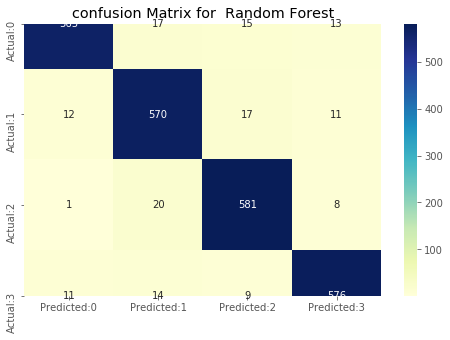

In [167]:
cm=confusion_matrix(y_test,lgb_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1','Predicted:2','Predicted:3'],
                         index=['Actual:0','Actual:1','Actual:2','Actual:3'])
print(conf_matrix)
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.title("confusion Matrix for  Random Forest")
plt.show()

In [168]:
print("Training accuracy:", accuracy_score(ytrain,lgb.predict(xtrain)))
print("Test accuracy:", accuracy_score(y_test,lgb_pred))
print("-"*100)
print("\n")
print("classification report for Decision Tree :\n\n",classification_report(y_test, lgb_pred))

Training accuracy: 1.0
Test accuracy: 0.9393442622950819
----------------------------------------------------------------------------------------------------


classification report for Decision Tree :

               precision    recall  f1-score   support

           0       0.96      0.93      0.94       610
           1       0.92      0.93      0.93       610
           2       0.93      0.95      0.94       610
           3       0.95      0.94      0.95       610

    accuracy                           0.94      2440
   macro avg       0.94      0.94      0.94      2440
weighted avg       0.94      0.94      0.94      2440



In [169]:
pred=lgb.predict(test)

In [170]:
submission=pd.DataFrame(pred,columns=["Severity"])

In [221]:
submission["Severity"].value_counts()

0    750
1    692
3    640
2    418
Name: Severity, dtype: int64

In [171]:
sub=test1[["Accident_ID"]]
sub["Severity"]=submission["Severity"]
sub["Severity"]=le.inverse_transform(submission["Severity"])

In [172]:
sub.to_csv("/users/akshay/desktop/HackerEarth/submission12.csv",index=False)

In [248]:
params = {"max_depth": [25,50,75,100,200],
              "learning_rate" : [0.01,0.05,0.1],
              "num_leaves": [300,900,1200,1500],
              "n_estimators": [200,300,400]
             }
gs = GridSearchCV(lgb, params, cv=5, n_jobs=-1)
gs_fit = gs.fit(xtrain,ytrain)
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score',ascending=False)[0:5]

KeyboardInterrupt: 

In [165]:
gs_fit.best_params_

{'learning_rate': 0.1, 'max_depth': 50, 'n_estimators': 200, 'num_leaves': 900}

In [206]:
pred=gs.predict(test)

In [219]:
a[0].value_counts()

0    750
1    692
3    640
2    418
Name: 0, dtype: int64

In [217]:
a=pd.DataFrame(pred)

In [245]:
xx=train[train["Accident_Type_Code"]==7]["Severity1"]

In [246]:
xx.value_counts()

2    599
3    327
0    196
1    154
Name: Severity1, dtype: int64

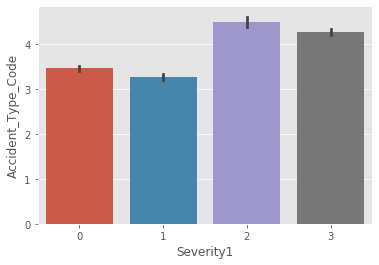

In [226]:
sns.barplot(y=train["Accident_Type_Code"],x=train["Severity1"])

In [173]:
train.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Severity1
0,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,1
1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,1
2,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2
3,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,3
4,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,2


In [174]:
a= np.power(2, train['Total_Safety_Complaints'])
b= np.power(2, train['Days_Since_Inspection'])
c= np.power(2,train['Safety_Score'])

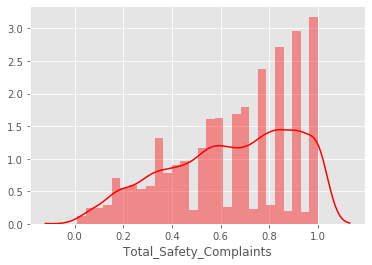

In [205]:
sns.distplot(np.power(0.01,xtrain['Total_Safety_Complaints']),color="red")

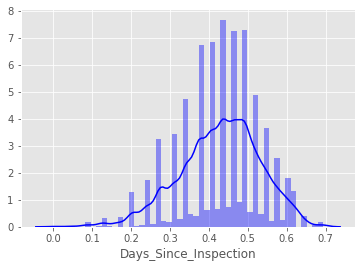

In [189]:
sns.distplot(np.log1p(xtrain['Days_Since_Inspection']),color="blue",norm_hist=True)

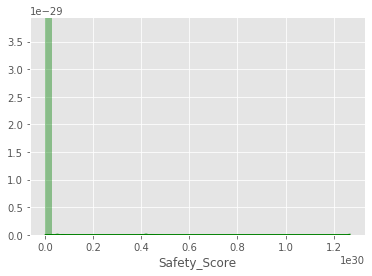

In [178]:
sns.distplot(c,color="green")

In [187]:
xtrain.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
1914,0.538356,0.363636,0.018519,0.580219,0.465318,0.108037,0.333333,0.614325,0.4,0.083727
984,0.305936,0.818182,0.166667,0.706016,0.215800,0.150637,0.166667,0.730576,0.4,0.273927
1865,0.635160,0.363636,0.018519,0.599818,0.157996,0.144049,0.500000,0.237867,0.4,0.012419
9305,0.227397,0.636364,0.240741,0.730173,0.179672,0.267457,0.500000,0.567033,0.4,0.028258
2437,0.289041,0.545455,0.018519,0.405196,0.495665,0.236715,0.333333,0.606194,0.0,0.082556
